# HW 9 
# Name: Hyunwoo Roh

# Question1
Neural network horse race. 

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.neural_network import MLPClassifier

In [7]:
import warnings
warnings.filterwarnings("ignore")
# read in data
drink=pd.read_csv("data\strongdrink.txt")
drink.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Create a scatterplot of the data where the x-variable is alcohol and y variable is color intensity

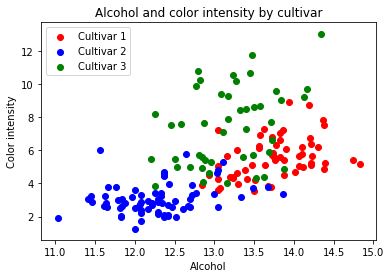

In [4]:
is_1 = drink.cultivar == 1
is_2 = drink.cultivar == 2
is_3 = drink.cultivar == 3

plt.scatter(drink[is_1].alco, drink[is_1].color_int, color='r', label="Cultivar 1")
plt.scatter(drink[is_2].alco, drink[is_2].color_int, color='b', label="Cultivar 2")
plt.scatter(drink[is_3].alco, drink[is_3].color_int, color='g', label="Cultivar 3")
plt.xlabel("Alcohol")
plt.ylabel("Color intensity")
plt.title("Alcohol and color intensity by cultivar")
plt.legend()
plt.show()

## (b) Use sk.learn to fit a multinomail logistic model of cultivar on given features.

In [5]:
x_variable_names = ['alco', 'malic', 'tot_phen', 'color_int']
y_name = ['cultivar']
Xvars = drink[x_variable_names].values
yvals = drink[y_name].values

In [8]:
clf_mlog = LogisticRegression(solver='newton-cg',multi_class='multinomial').fit(Xvars, yvals)
param_dist1 = {'penalty': ['l1','l2'],'C': sp_uniform(0.1, 10.0)}
random_search1 = RandomizedSearchCV(LogisticRegression().fit(Xvars, yvals), 
                                    param_distributions=param_dist1,
                                    n_iter=200, n_jobs=-1, cv=5, random_state=25,
                                    scoring='neg_mean_squared_error')
random_search1.fit(Xvars,yvals)
print('RandBestEstimator1=', random_search1.best_estimator_)
print('RandBestParams1=', random_search1.best_params_)
print('RandBestScore1=', -random_search1.best_score_)

RandBestEstimator1= LogisticRegression(C=2.665871587495725, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
RandBestParams1= {'C': 2.665871587495725, 'penalty': 'l1'}
RandBestScore1= 0.11931818181818182


## (c) Use sklearn randomforest to fit a random forest model of cultivar on the same four features used in part (b)

In [13]:
rfc = RandomForestClassifier(random_state=25).fit(Xvars, yvals)

In [14]:
param_dist2 = {'n_estimators':sp_randint(10,200),
                'max_depth': sp_randint(2,4),
                'min_samples_split': sp_randint(2, 20),
                'min_samples_leaf': sp_randint(2, 20),
                'max_features': sp_randint(1, 4)}


random_search2 = RandomizedSearchCV(rfc, param_distributions=param_dist2,
                       n_iter=200, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')

random_search2.fit(Xvars,yvals)
print('RandBestEstimator2=', random_search2.best_estimator_)
print('RandBestParams2=', random_search2.best_params_)
print('RandBestScore2=', -random_search2.best_score_)

RandBestEstimator2= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=13, min_samples_split=18,
            min_weight_fraction_leaf=0.0, n_estimators=176, n_jobs=None,
            oob_score=False, random_state=25, verbose=0, warm_start=False)
RandBestParams2= {'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 13, 'min_samples_split': 18, 'n_estimators': 176}
RandBestScore2= 0.13068181818181818


## (d) Use sklearn to fit a support vector machines classifier model of cultivar with a gausisan radial basis function kernel on the four features used in parts b and c.

In [15]:
svc= SVC(kernel="rbf", degree=2).fit(Xvars, yvals)

In [16]:
param_dist3 = {'C':sp_uniform(loc=0.1,scale=10.0),
               'gamma':["scale","auto"],
               'shrinking':[True,False]}

random_search3 = RandomizedSearchCV(svc, param_distributions=param_dist3,
                       n_iter=200, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')

random_search3.fit(Xvars,yvals)
print('RandBestEstimator2=', random_search3.best_estimator_)
print('RandBestParams2=', random_search3.best_params_)
print('RandBestScore2=', -random_search3.best_score_)

RandBestEstimator2= SVC(C=3.3605112613782553, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
RandBestParams2= {'C': 3.3605112613782553, 'gamma': 'scale', 'shrinking': True}
RandBestScore2= 0.14772727272727273


## (e) Use neural net MLPClassifier to fit a multiple hidden layer neural network model of cultivar.

In [17]:
mlp= MLPClassifier(activation='tanh', solver='lbfgs', alpha=0.1).fit(Xvars, yvals)

In [18]:
param_dist4 = {'hidden_layer_sizes':sp_randint(1, 100),
               'activation':["logistic", "relu"],
               'alpha': sp_uniform(0.1, 10.0)}

random_search4 = RandomizedSearchCV(mlp, param_distributions=param_dist4,
                       n_iter=200, n_jobs=-1, cv=5, random_state=25,
                       scoring='neg_mean_squared_error')

random_search4.fit(Xvars,yvals)
print('RandBestEstimator2=', random_search4.best_estimator_)
print('RandBestParams2=', random_search4.best_params_)
print('RandBestScore2=', -random_search4.best_score_)

RandBestEstimator2= MLPClassifier(activation='relu', alpha=0.3814739739579308, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=42, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
RandBestParams2= {'activation': 'relu', 'alpha': 0.3814739739579308, 'hidden_layer_sizes': 42}
RandBestScore2= 0.07386363636363637


## (f) Which of the above three models do you think is the best predictor of cultivar?

In terms of the MSE value, neural net MSLP is the best with the lowest MSE. 